<h1>Dados ausêntes - Kaggle - House Prices</h1>

In [3]:
#Importando livrarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h1>Importando dados</h1>

In [4]:
#Importando o arquivo train_set.csv
data_set = pd.read_csv('train.csv')
print("The data_set have %i lines and %i columns" % data_set.shape)

The data_set have 1460 lines and 81 columns


# Análise Exploratória

In [44]:
#Checando as colunas
data_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

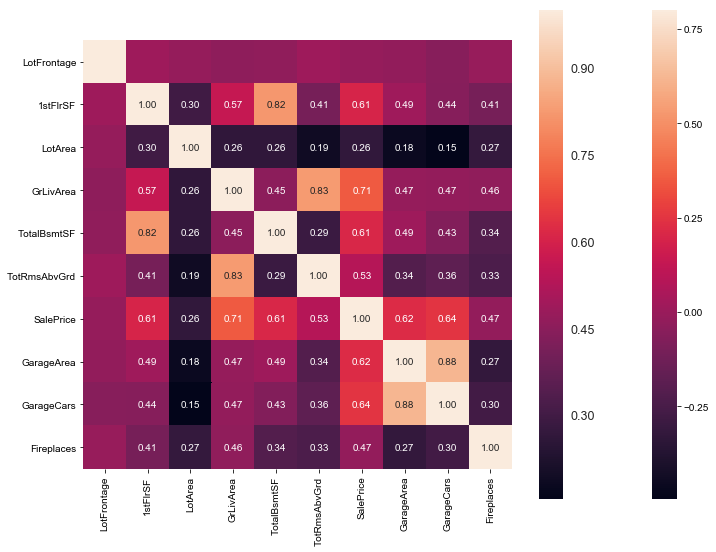

In [6]:
#Checking the correlation matrix
corrmat = data_set.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
#Zoom in correlation matrix cheking the top 10 features
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'LotFrontage')['LotFrontage'].index
cm = np.corrcoef(data_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [52]:
#Verificando algumas caracteristicas do nosso target
data_set['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

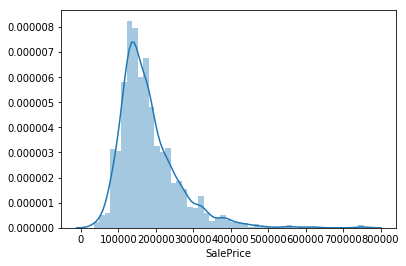

In [46]:
#Verificando a distribuição normal do nosso target (SalePrice)
sns.distplot(data_set['SalePrice']);


Verificando a obliquidade (Skewness)
- Se Skewness>0, então a distribuição tem uma cauda direita (valores acima da média) mais pesada
- Se Skewness<0, então a distribuição tem uma cauda esquerda (valores abaixo da média) mais pesada
- Se Skewness=0, então a distribuição é aproximadamente simétrica (na terceira potência do desvio em relação à média).

Verificado a curtose (Kurtosis) ou achatamento da distribuição normal
- Se o valor da curtose for = 0, então tem o mesmo achatamento que a distribuição normal. Chama-se a estas funções de mesocúrticas.
- Se o valor é > 0, então a distribuição em questão é mais alta (afunilada) e concentrada que a distribuição normal. Diz-se que esta função probabilidade é leptocúrtica, ou que a distribuição tem caudas pesadas (o significado é que é relativamente fácil obter valores que não se aproximam da média a vários múltiplos do desvio padrão)
- Se o valor é < 0, então a função de distribuição é mais "achatada" que a distribuição normal. Chama-se-lhe platicúrtica

In [47]:
print("Skewness: %f" % data_set['SalePrice'].skew())
print("Kurtosis: %f" % data_set['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Então caso temos uma função probabilidade de calda longa e leptocúrtica

Como os modelos de regressão lineares tendem a funcionar melhor com uma maior normalidade iremos lider com uma transformação do SalePrice

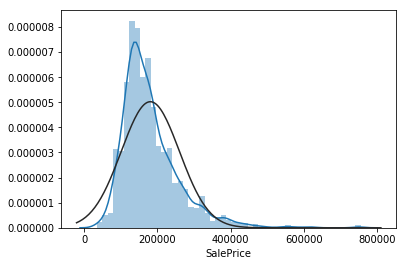

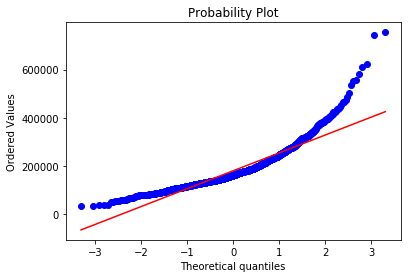

In [48]:
#Histograma vs. curva normal
sns.distplot(data_set['SalePrice'], fit=norm);
fig = plt.figure()
#Probabilidade normal
res = stats.probplot(data_set['SalePrice'], plot=plt)

In [49]:
#Transformação log no SalePrice
data_set['SalePrice'] = np.log(data_set['SalePrice'])

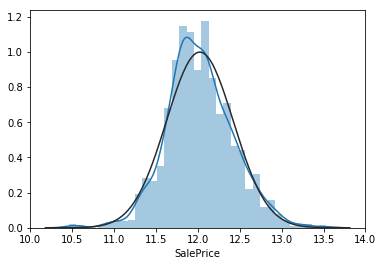

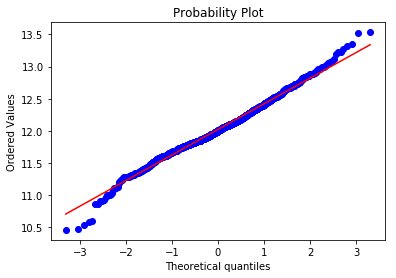

In [50]:
#Histograma vs. curva normal
sns.distplot(data_set['SalePrice'], fit=norm);
fig = plt.figure()
#Probabilidade normal
res = stats.probplot(data_set['SalePrice'], plot=plt)

In [51]:
print("Skewness: %f" % data_set['SalePrice'].skew())
print("Kurtosis: %f" % data_set['SalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


Parece que ao aplicar a transformação log os dados apresentão um distribuiçào muito mais próxima a da curva normal.

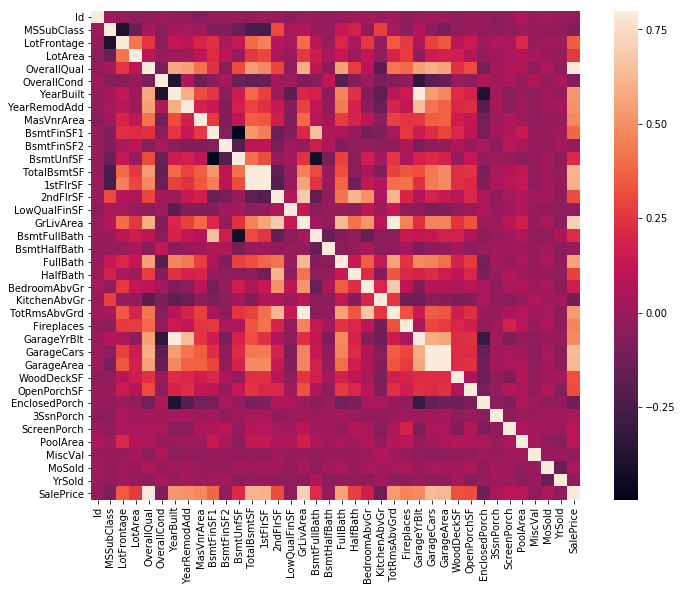

In [11]:
#Checking the correlation matrix
corrmat = data_set.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

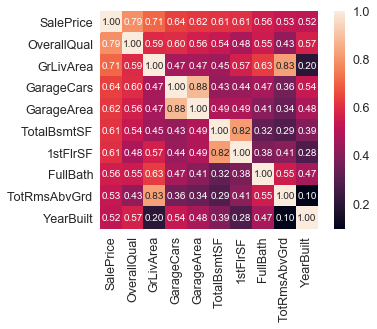

In [7]:
#Zoom in correlation matrix cheking the top 10 features
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

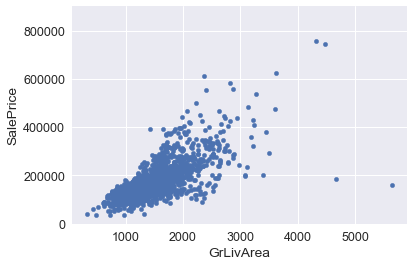

In [8]:
var = 'GrLivArea'
data = pd.concat([train_set['SalePrice'], train_set[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,900000));

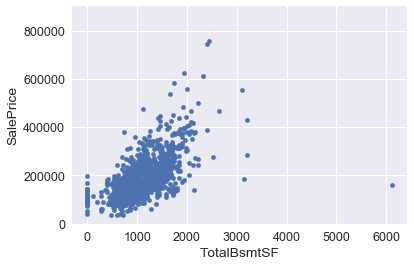

In [9]:
var = 'TotalBsmtSF'
data = pd.concat([train_set['SalePrice'], train_set[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,900000));

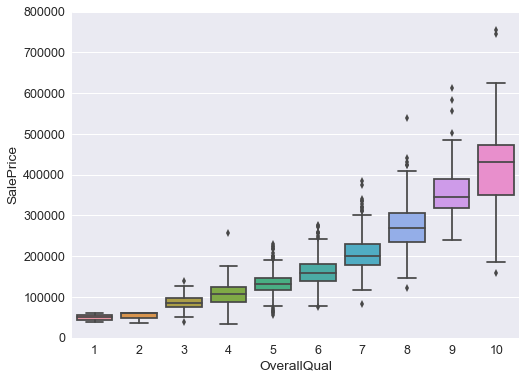

In [10]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train_set['SalePrice'], train_set[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

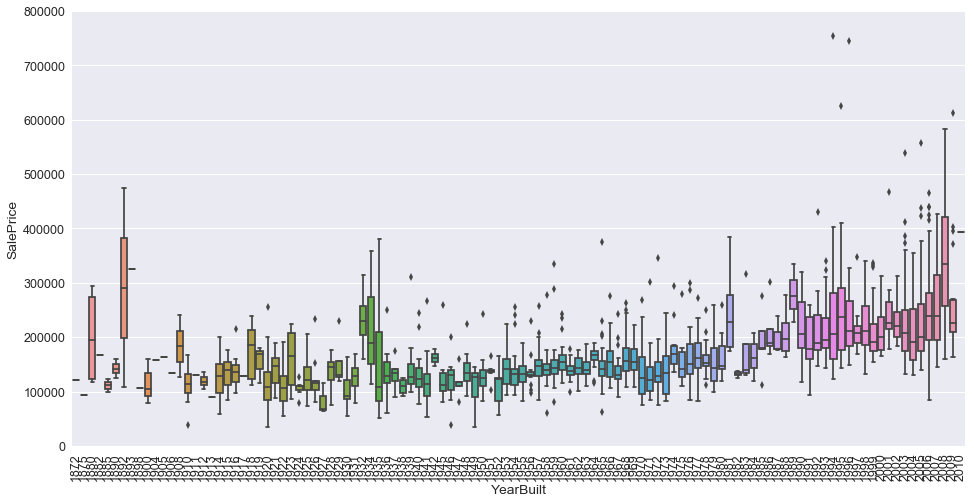

In [11]:
var = 'YearBuilt'
data = pd.concat([train_set['SalePrice'], train_set[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

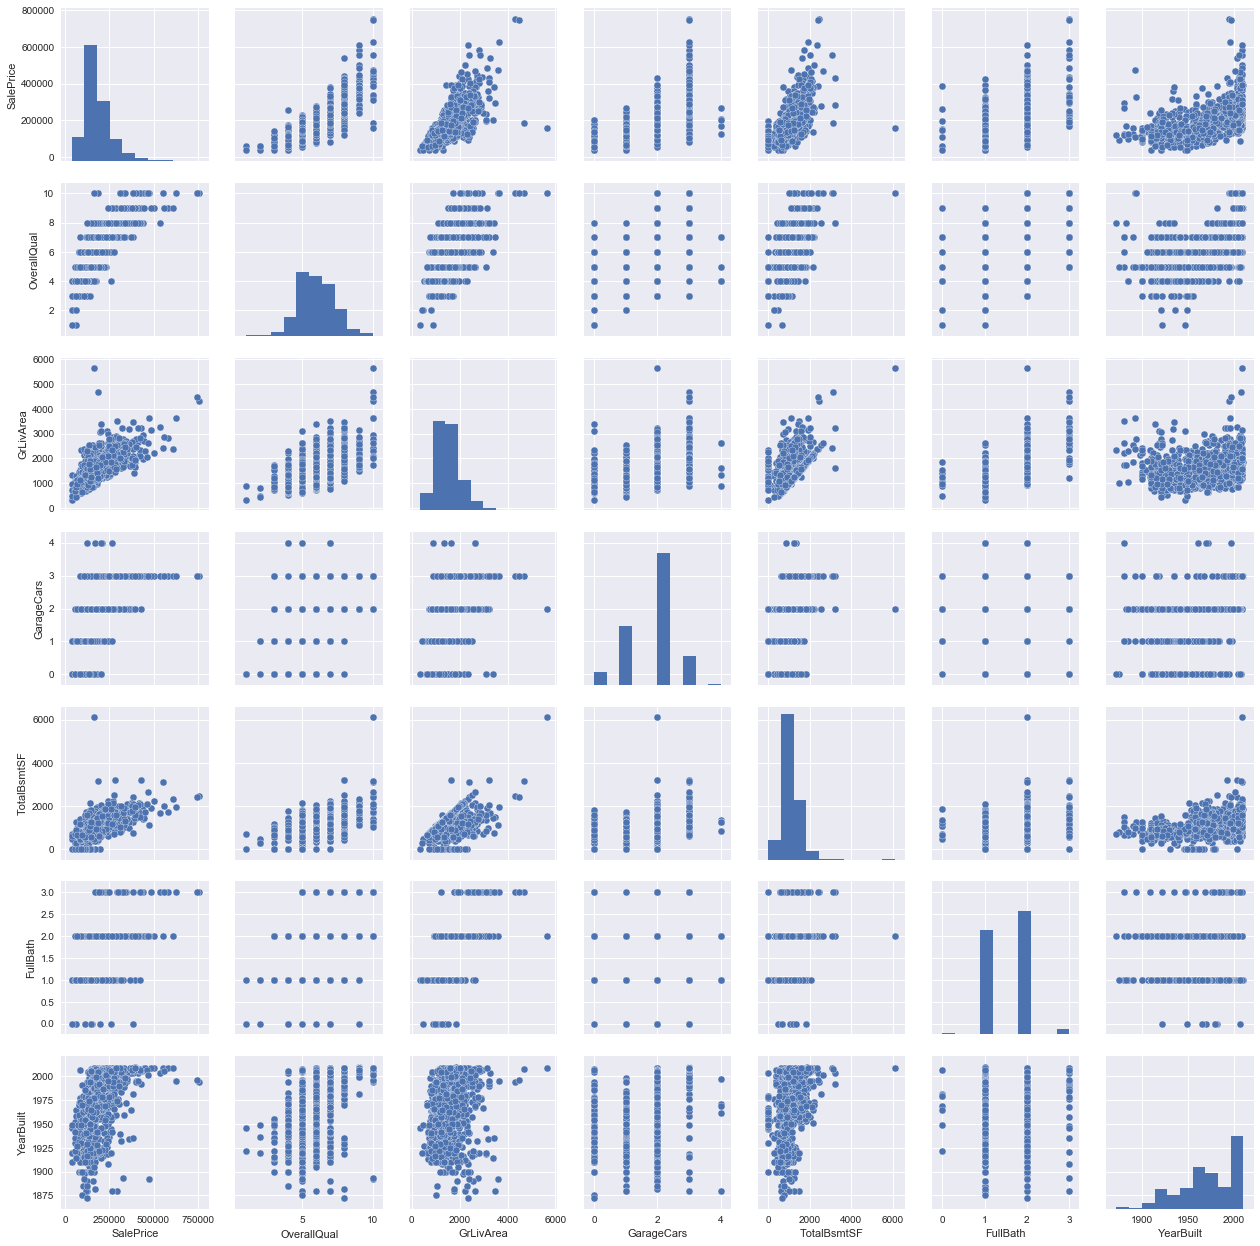

In [12]:
#scatterplot of the top 10 correlated features
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_set[cols], size = 2.5)
plt.show();

<h1>Analysing the missing data</h1>

In [13]:
#missing data
total = train_set.isnull().sum().sort_values(ascending=False)
percent = (train_set.isnull().sum()/train_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [14]:
#playground


In [15]:
#dealing with missing data
train_set = train_set.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_set = train_set.drop(train_set.loc[train_set['Electrical'].isnull()].index)
train_set.isnull().sum().max() #just checking that there's no missing data missing...

0

<h4>Outliers</h4>

In [16]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train_set['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


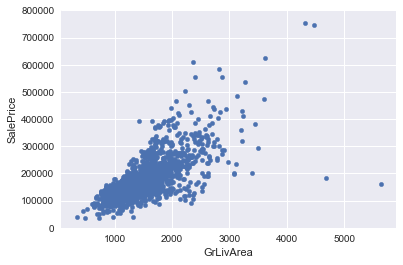

In [17]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train_set['SalePrice'], train_set[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [18]:
#deleting points
train_set.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_set = train_set.drop(train_set[train_set['Id'] == 1299].index)
train_set = train_set.drop(train_set[train_set['Id'] == 524].index)


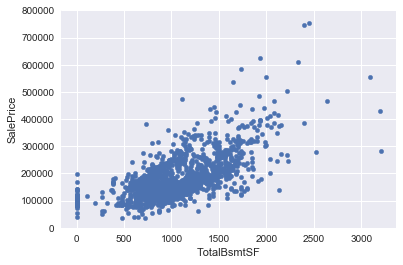

In [19]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([train_set['SalePrice'], train_set[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

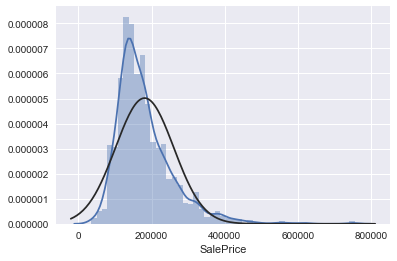

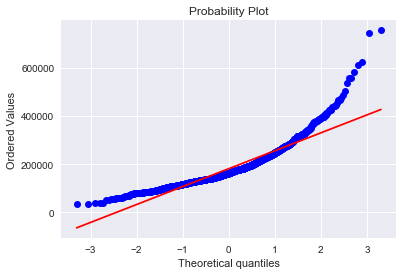

In [20]:
#histogram and normal probability plot
sns.distplot(train_set['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_set['SalePrice'], plot=plt)

In [21]:
#applying log transformation
train_set['SalePrice'] = np.log(train_set['SalePrice'])

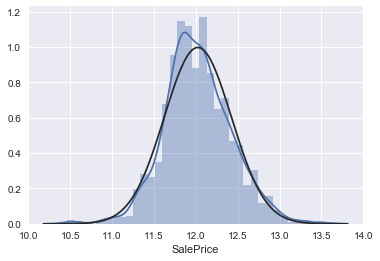

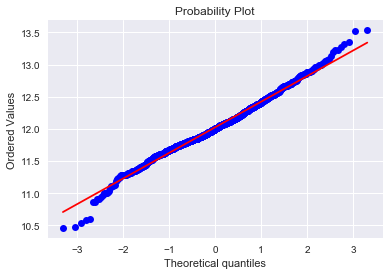

In [22]:
#transformed histogram and normal probability plot
sns.distplot(train_set['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_set['SalePrice'], plot=plt)

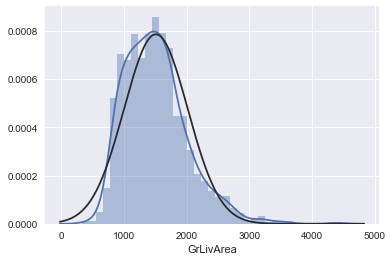

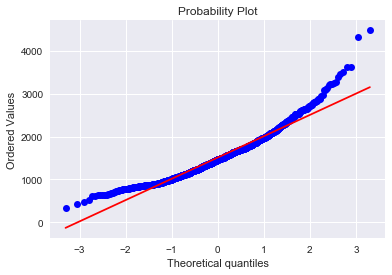

In [23]:
#histogram and normal probability plot
sns.distplot(train_set['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_set['GrLivArea'], plot=plt)

In [24]:
#data transformation
train_set['GrLivArea'] = np.log(train_set['GrLivArea'])

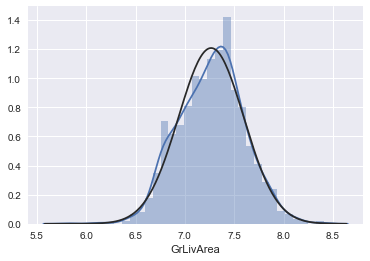

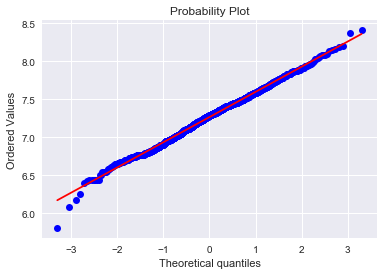

In [25]:
#transformed histogram and normal probability plot
sns.distplot(train_set['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_set['GrLivArea'], plot=plt)

In [26]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train_set['HasBsmt'] = pd.Series(len(train_set['TotalBsmtSF']), index=train_set.index)
train_set['HasBsmt'] = 0 
train_set.loc[train_set['TotalBsmtSF']>0,'HasBsmt'] = 1

In [27]:
#transform data
train_set.loc[train_set['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_set['TotalBsmtSF'])

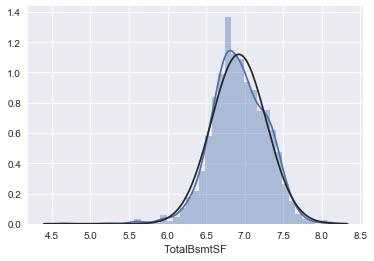

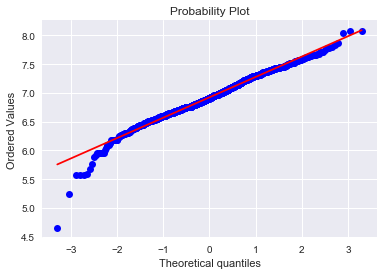

In [28]:
#histogram and normal probability plot
sns.distplot(train_set[train_set['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_set[train_set['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

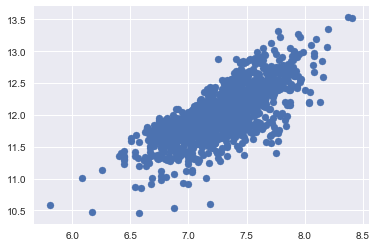

In [29]:
#scatter plot
plt.scatter(train_set['GrLivArea'], train_set['SalePrice']);

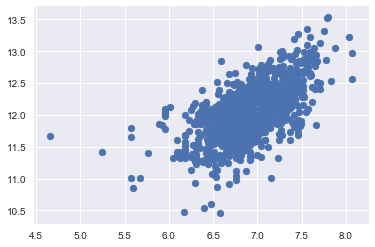

In [30]:
#scatter plot
plt.scatter(train_set[train_set['TotalBsmtSF']>0]['TotalBsmtSF'], train_set[train_set['TotalBsmtSF']>0]['SalePrice']);

In [31]:
#convert categorical variable into dummy
train_set = pd.get_dummies(train_set)

<h2>Preprossesing</h2>

In [32]:
#Importing train set
train_set = pd.read_csv('train.csv')
train_set = train_set.drop(1379)
#Importing train set
test_set = pd.read_csv('test.csv')
print("The train set have %i lines and %i columns" % train_set.shape)
print("The test set have %i lines and %i columns" % test_set.shape)

The train set have 1459 lines and 81 columns
The test set have 1459 lines and 80 columns


In [33]:
#Adicionando de preços coluna vazia no testset
test_set["SalePrice"] = ""
test_set["SalePrice"] = np.nan
print("The train set have %i lines and %i columns" % train_set.shape)
print("The test set have %i lines and %i columns" % test_set.shape)

The train set have 1459 lines and 81 columns
The test set have 1459 lines and 81 columns


In [34]:
#Concatenando train e test set
total_set = pd.concat([train_set, test_set])
total_set=total_set.reset_index()
print("The total set have %i lines and %i columns" % total_set.shape)
#Salvando arquivo em csv
#total_set.to_csv("total_data.csv", sep=',')

The total set have 2918 lines and 82 columns


In [35]:
total_set.describe()

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2918.000000,2918.000000,2918.000000,2432.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2895.000000,...,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,1459.000000
mean,729.027416,1460.027416,57.129883,69.304276,10168.262509,6.089445,5.564770,1971.300891,1984.256683,102.236615,...,93.707676,47.503084,23.106237,2.603153,16.067855,2.252570,50.843386,6.213502,2007.792666,180930.394791
std,421.294029,842.930190,42.522808,23.349585,7888.344068,1.410045,1.113272,30.289823,20.893684,179.355169,...,126.548222,67.581354,64.253833,25.192440,56.193208,35.670034,567.498680,2.715134,1.315184,79468.964025
min,0.000000,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.250000,730.250000,20.000000,59.000000,7477.000000,5.000000,5.000000,1953.250000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129950.000000
50%,729.000000,1460.500000,50.000000,68.000000,9452.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,26.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1093.750000,2189.750000,70.000000,80.000000,11573.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [36]:
#missing data
total = total_set.isnull().sum().sort_values(ascending=False)
percent = (total_set.isnull().sum()/total_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(30)

,Total,Percent
PoolQC,2908,0.996573
MiscFeature,2813,0.964016
Alley,2720,0.932145
Fence,2347,0.804318
SalePrice,1459,0.500000
FireplaceQu,1419,0.486292
LotFrontage,486,0.166552
GarageQual,159,0.054489
GarageYrBlt,159,0.054489
GarageFinish,159,0.054489


In [37]:
total_set = total_set.drop(['PoolQC',
'MiscFeature',
'Alley',
'Fence',
'FireplaceQu',
'LotFrontage',
'GarageCond',
'GarageType',
'GarageYrBlt',
'GarageFinish',
'GarageQual',
'BsmtExposure',
'BsmtFinType2',
'BsmtFinType1',
'BsmtCond',
'BsmtQual',
'MasVnrArea',
'MasVnrType',],1)

total_set.isnull().sum().max() #just checking that there's no missing data missing...

1459

In [38]:
#applying log transformation
#total_set['SalePrice'] = np.log(total_set['SalePrice'])
total_set['GrLivArea'] = np.log(total_set['GrLivArea'])

In [39]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
total_set['HasBsmt'] = pd.Series(len(total_set['TotalBsmtSF']), index=total_set.index)
total_set['HasBsmt'] = 0 
total_set.loc[total_set['TotalBsmtSF']>0,'HasBsmt'] = 1

In [40]:
#transform data
total_set.loc[total_set['HasBsmt']==1,'TotalBsmtSF'] = np.log(total_set['TotalBsmtSF'])

In [41]:
#Função de tratamento dos dados
def DataPreprocessing(df):
    
    #Selecionando apenas dados numéricos
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    num_features = df.select_dtypes(include=numerics)
    nf = list(num_features)
    
    #Selecionando apenas dados categoricos
    categorical = ['object']
    cat_features = df.select_dtypes(include=categorical)
    cf = list(cat_features)
    
    #Cuidadndo dos dados categoricos
    cat_features = pd.get_dummies(cat_features)
    from sklearn.preprocessing import Imputer
    imputer = Imputer(strategy="median")
    imputer = imputer.fit_transform(num_features)
    num_features = pd.DataFrame(imputer, columns=num_features.columns,
                          index = list(num_features.index.values))
    X = pd.concat([num_features, cat_features], axis=1)
    from sklearn.preprocessing import Imputer
    imputer = Imputer(strategy="median")
    imputer = imputer.fit_transform(X)
    new_df = pd.DataFrame(imputer, columns=X.columns,
                          index = list(X.index.values))
    return new_df
    
    
''' from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler = scaler.fit_transform(new_df)
    new_df = pd.DataFrame(scaler, columns=X.columns,
                          index = list(X.index.values))'''
    
    


' from sklearn.preprocessing import MinMaxScaler\n    scaler = MinMaxScaler()\n    scaler = scaler.fit_transform(new_df)\n    new_df = pd.DataFrame(scaler, columns=X.columns,\n                          index = list(X.index.values))'

In [42]:
#Processando o total_set
total_set = DataPreprocessing(total_set)


In [43]:
#Checando o total_set
total_set.head(5)


,index,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,1.0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,2.0,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,3.0,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,4.0,70.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.0,5.0,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
#Removendo coluna de Id, esta coluna atrapalharia no modelo
total_set = total_set.drop("Id", axis=1)

In [45]:
#Dividindo train e test set
train_set = total_set.iloc[:1459, :]
test_set = total_set.iloc[1459:,:]
print(train_set.shape)
print(test_set.shape)

(1459, 223)
(1459, 223)


In [46]:
#Dividindo as features e target
y_train = train_set['SalePrice']
X_train = train_set.drop(labels='SalePrice', axis=1)

In [47]:
#Dividindo as features e target
y_test = test_set['SalePrice']
X_test = test_set.drop(labels='SalePrice', axis=1)

<h1>MODELING</h1>

In [48]:
#Importing performance measure
from sklearn.metrics import mean_squared_error

<h4>Linear Regression</h4>

In [49]:
#Defining Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(X_train, y_train)
#Making Predictions on train_set
predict_train = model.predict(X_train)

#Measuring Performance
score = mean_squared_error(y_train, predict_train)
performance = {'LinearRegression': score}
print(performance)

{'LinearRegression': 477198342.77796358}


<h4>Stochastic Gradient Descent</h4>

In [50]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(alpha=0.0001)
model = model.fit(X_train, y_train)
#Making Predictions on train_set
predict_train = model.predict(X_train)

#Measuring Performance
score = mean_squared_error(y_train, predict_train)
performance['Stochastic Gradient Descent'] = score
print(performance)

{'LinearRegression': 477198342.77796358, 'Stochastic Gradient Descent': 1.9408576116991421e+33}


<h4>Decision Tree</h4>

In [51]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model = model.fit(X_train, y_train)
#Making Predictions on train_set
predict_train = model.predict(X_train)

#Measuring Performance
score = mean_squared_error(y_train, predict_train)
performance['DecisionTreeRegressor'] = score
print(performance)

{'LinearRegression': 477198342.77796358, 'Stochastic Gradient Descent': 1.9408576116991421e+33, 'DecisionTreeRegressor': 0.0}


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model = model.fit(X_train, y_train)
#Making Predictions on train_set
predict_train = model.predict(X_train)

#Measuring Performance
score = mean_squared_error(y_train, predict_train)
performance['GradientBoostingRegressor'] = score
print(performance)

{'LinearRegression': 477198342.77796358, 'Stochastic Gradient Descent': 1.9408576116991421e+33, 'DecisionTreeRegressor': 0.0, 'GradientBoostingRegressor': 216371195.88482812}


In [53]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model = model.fit(X_train, y_train)
#Making Predictions on train_set
predict_train = model.predict(X_train)

#Measuring Performance
score = mean_squared_error(y_train, predict_train)
performance['RandomForestRegressor'] = score
print(performance)

{'LinearRegression': 477198342.77796358, 'Stochastic Gradient Descent': 1.9408576116991421e+33, 'DecisionTreeRegressor': 0.0, 'GradientBoostingRegressor': 216371195.88482812, 'RandomForestRegressor': 149308084.72979435}


In [54]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model = model.fit(X_train, y_train)
#Making Predictions on train_set
predict_train = model.predict(X_train)

#Measuring Performance
score = mean_squared_error(y_train, predict_train)
performance['ExtraTreesRegressor'] = score
print(performance)

{'LinearRegression': 477198342.77796358, 'Stochastic Gradient Descent': 1.9408576116991421e+33, 'DecisionTreeRegressor': 0.0, 'GradientBoostingRegressor': 216371195.88482812, 'RandomForestRegressor': 149308084.72979435, 'ExtraTreesRegressor': 0.0}


In [56]:
#Realizando previsões no test_set
predict_train = model.predict(X_test)

#Trans
predicts = pd.DataFrame(data=predict_train, columns = ['SalePrice'] )

predicts.index += 1461 
predicts.index.name = "Id"

#Reescalando valores

#minimo = 34900
#maximo = 755000

#predicts['SalePrice']=predicts['SalePrice']*(maximo-minimo)+minimo

#Exportanto previsões performance
predicts.to_csv("predicts.csv", sep=',')

#performance = pd.DataFrame(columns=['MODEL','MEAN SQUARED ERROR'], index=None)
#performance['MODEL']='NAME'
#performance.head()
